## 班佛定律
**班佛定律**，也被稱為第一位數法則，是一個關於在許多真實世界數據集中，首位數字出現頻率的觀察。 簡單來說，它指出數字 1 出現為首位數字的機率約為 30%，而數字 9 出現為首位數字的機率則小於 5%。

更詳細的說明：

* 非均勻分佈： 與直覺相反，數字 1 到 9 並非以相同的機率作為數據集中的首位數字。
* 對數分佈： 班佛定律指出，首位數字 d 出現的機率，可以用以下公式計算： P(d) = log10(1 + 1/d)

### Python Package 所需套件

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### 資料來源
監察院-政治獻金公開查閱平台 https://ardata.cy.gov.tw/home   
透過 Shell/Batch 下載後，再合併為一個檔案

In [2]:
def read_csvs(path):
    """
    從指定目錄讀取所有 CSV 檔案，並將其合併為一個 Pandas DataFrame。

    參數：
    path (str): 包含 CSV 檔案的目錄路徑。

    回傳：
    pandas.DataFrame: 合併後的 DataFrame，如果目錄中沒有 CSV 檔案則回傳 None。
    """

    all_data = []

    try:
        for csvf in os.listdir(path):
            if csvf.endswith(".csv"):  # 檢查檔案是否為 CSV 格式
                datf = os.path.join(path, csvf)  # 取得完整檔案路徑
                df = pd.read_csv(datf)  # 讀取 CSV 檔案
                all_data.append(df)  # 將 DataFrame 加入列表
        
        if all_data:  # 檢查列表中是否有 DataFrame
            return pd.concat(all_data, ignore_index=True)  # 合併所有 DataFrame
        else:
            print(f"在目錄 '{path}' 中找不到 CSV 檔案。")
            return None

    except FileNotFoundError:
        print(f"目錄 '{path}' 不存在。")
        return None

In [3]:
csv_dir = 'DATA/立法委員'

In [4]:
# 讀取 CSV 檔案
df = read_csvs(csv_dir)

In [5]:
# 顯示前 10 筆資料
df.head(10)

,項目名稱,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,...,存入專戶日期,返還/繳庫,應揭露之支出對象,支出對象之內部人員姓名,支出對象之內部人員職稱,政黨之內部人員姓名,政黨之內部人員職稱,關係,更正註記,資料更正日期
0,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,個人捐贈收入,蔡韻秋,NaN,10000.0,0.0,NaN,...,112 年 12 月 27 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,個人捐贈收入,王信宗,NaN,10000.0,0.0,NaN,...,112 年 12 月 27 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,個人捐贈收入,張寶仁,NaN,10000.0,0.0,NaN,...,112 年 12 月 27 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,個人捐贈收入,袁新民,NaN,10000.0,0.0,NaN,...,112 年 12 月 27 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,個人捐贈收入,邱明正,T12*******,10000.0,0.0,NaN,...,112 年 12 月 27 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,人民團體捐贈收入,社團法人高雄市醫師公會,NaN,60000.0,0.0,NaN,...,113 年 01 月 02 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,個人捐贈收入,張木村,Q10*******,20000.0,0.0,NaN,...,112 年 12 月 29 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,營利事業捐贈收入,皇華材料科技股份有限公司,75964174,200000.0,0.0,NaN,...,112 年 12 月 28 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,個人捐贈收入,蔡崇禮,E10*******,50000.0,0.0,NaN,...,112 年 12 月 27 日,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,林岱樺,113年立法委員選舉,首次,112 年 12 月 27 日,營利事業捐贈收入,竣揚工業股份有限公司,13168348,100000.0,0.0,NaN,...,112 年 12 月 27 日,已返還,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 以 '收支科目' 統計筆數
df['收支科目'].value_counts()

收支科目
個人捐贈收入       51143
雜支支出         46832
人事費用支出       20304
交通旅運支出       18655
宣傳支出         15762
匿名捐贈         11283
集會支出          8077
營利事業捐贈收入      5897
租用宣傳車輛支出      4271
公共關係費用支出      3015
租用競選辦事處支出     1345
返還捐贈支出         815
人民團體捐贈收入       710
其他收入           302
政黨捐贈收入         131
繳庫支出            24
金錢               1
Name: count, dtype: int64

### 個人捐贈收入

In [7]:
# 篩選 
# [收支科目]=個人捐贈收入
# 
df_per = df[df['收支科目'] == '個人捐贈收入']

In [8]:
# 資料筆數
print("資料總筆數：", df.shape)
print("個人捐贈：", df_per.shape)

資料總筆數： (188568, 24)
個人捐贈： (51143, 24)


In [9]:
# 相關欄位
df_per2 = df_per[['項目名稱', '捐贈者／支出對象','身分證／統一編號','收入金額',
                 '地址','聯絡電話','捐贈方式']]
df_per2.head(10)

,項目名稱,捐贈者／支出對象,身分證／統一編號,收入金額,地址,聯絡電話,捐贈方式
0,林岱樺,蔡韻秋,NaN,10000.0,高雄市左營區****,NaN,匯款
1,林岱樺,王信宗,NaN,10000.0,高雄市三民區****,NaN,匯款
2,林岱樺,張寶仁,NaN,10000.0,臺南市永康區****,NaN,匯款
3,林岱樺,袁新民,NaN,10000.0,臺南市永康區****,NaN,匯款
4,林岱樺,邱明正,T12*******,10000.0,屏東縣屏東市****,NaN,匯款
6,林岱樺,張木村,Q10*******,20000.0,高雄市大寮區****,0910*****,現金
8,林岱樺,蔡崇禮,E10*******,50000.0,高雄市新興區****,0927*****,匯款
13,林岱樺,王友道,S12*******,100000.0,高雄市大寮區****,07-6*****,現金
17,林岱樺,劉冠群,S12*******,20000.0,高雄市林園區****,0958*****,現金
20,林岱樺,王瑞豪,E12*******,50000.0,高雄市仁武區****,0979*****,現金


In [10]:
# 筆數統計
df_per2['捐贈方式'].value_counts()

捐贈方式
匯款    31650
現金    18602
票據      669
Name: count, dtype: int64

In [11]:
cate = ['匯款','現金','票據']
df_per3=df_per2[df_per2['捐贈方式'].isin(cate)]

In [12]:
# 筆數統計
df_per3['捐贈方式'].value_counts()

捐贈方式
匯款    31650
現金    18602
票據      669
Name: count, dtype: int64

In [13]:
# Benford's Law 預期的第一個數字分佈
def benford_distribution():
    return [np.log10(1 + 1 / d) for d in range(1, 10)]

In [14]:
# 統計第一個數字的計數
def calc_first_digit(result, name, amt_val):
    #print(name,amt_val)
    d = int(str(amt_val)[0])
    result[name][d] += 1    
    

In [15]:
# 以捐贈方式，建立一個長度為10的整數陣列
benford_data = {}
for c in cate:
    benford_data[c] = np.zeros(10,dtype=int)

In [16]:
# 逐筆累計
for idx,row in df_per3.iterrows():
    #print(row)
    calc_first_digit(benford_data,row['捐贈方式'],row['收入金額'])

In [17]:
print(benford_data)

{'匯款': array([    0, 14574,  5079,  3593,   340,  5910,  1371,   175,   412,
         196]), '現金': array([   0, 9808, 3359, 1550,  180, 2559,  830,   61,  193,   62]), '票據': array([  0, 413,  61,  47,   2, 123,  16,   0,   5,   2])}


In [18]:
# 計算分佈
benford_result = {}
for name in cate:
    benford_result[name] = np.zeros(10,dtype=float)
    sub_total = np.sum(benford_data[name][1:10])
    for i in range(1,10):
        benford_result[name][i] = benford_data[name][i]/sub_total

print(benford_result)

{'匯款': array([0.        , 0.46047393, 0.16047393, 0.11352291, 0.0107425 ,
       0.18672986, 0.04331754, 0.00552923, 0.01301738, 0.00619273]), '現金': array([0.        , 0.52725513, 0.18057198, 0.08332437, 0.00967638,
       0.13756585, 0.04461886, 0.00327922, 0.01037523, 0.00333297]), '票據': array([0.        , 0.61733931, 0.09118087, 0.07025411, 0.00298954,
       0.1838565 , 0.02391629, 0.        , 0.00747384, 0.00298954])}


In [19]:
# 班佛定律理論值
expected = benford_distribution()

In [20]:
# 設定中文字型
# 依不同平台 (Windows/Mac) 需設定不同中文字型
# 或將範例的中文字改為英文

# Windows 
#plt.rcParams['font.family'] = 'SimHei'

# Mac
plt.rcParams['font.family'] = 'Heiti TC' 


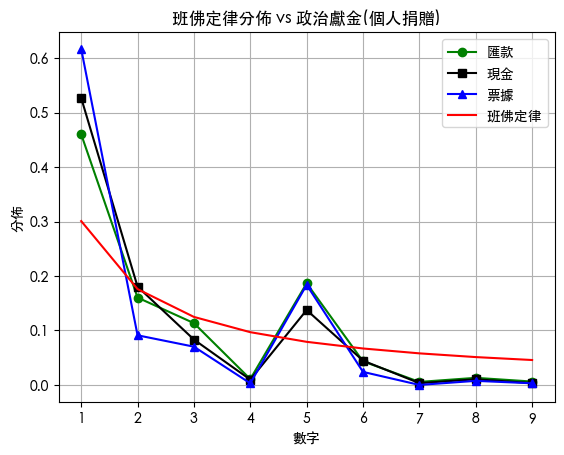

In [21]:
# 繪圖
digits = range(1, 10)

plt.plot(digits, benford_result['匯款'][1:10], label='匯款',color='green', marker='o', linestyle='-')
plt.plot(digits, benford_result['現金'][1:10], label='現金',color='black', marker='s', linestyle='-')
plt.plot(digits, benford_result['票據'][1:10], label='票據',color='blue', marker='^', linestyle='-')

plt.plot(digits, expected, label="班佛定律", color='red',linestyle='-')

plt.xlabel('數字')
plt.ylabel('分佈')
plt.title("班佛定律分佈 vs 政治獻金(個人捐贈)")
plt.legend()
plt.grid(True)
plt.show()

### 支出分析

In [22]:
# 篩選 
# [收支]=支出
# 
df['收支科目'].value_counts()


收支科目
個人捐贈收入       51143
雜支支出         46832
人事費用支出       20304
交通旅運支出       18655
宣傳支出         15762
匿名捐贈         11283
集會支出          8077
營利事業捐贈收入      5897
租用宣傳車輛支出      4271
公共關係費用支出      3015
租用競選辦事處支出     1345
返還捐贈支出         815
人民團體捐贈收入       710
其他收入           302
政黨捐贈收入         131
繳庫支出            24
金錢               1
Name: count, dtype: int64

In [23]:
cate = ['雜支支出','人事費用支出','交通旅運支出','宣傳支出']
df_out=df[df['收支科目'].isin(cate)]

In [24]:
# 相關欄位
df_out2 = df_out[[ '項目名稱', '收支科目','身分證／統一編號','支出金額','支出用途',
                 '地址','聯絡電話','應揭露之支出對象','支出對象之內部人員姓名']]
df_out2.head(10)

,項目名稱,收支科目,身分證／統一編號,支出金額,支出用途,地址,聯絡電話,應揭露之支出對象,支出對象之內部人員姓名
18,林岱樺,雜支支出,28640610,998.0,文具用品費用,NaN,NaN,否,NaN
19,林岱樺,宣傳支出,54340511,50000.0,播放、傳送或刊登宣傳廣告費用,臺北市內湖區****,NaN,否,NaN
23,林岱樺,雜支支出,19762247,135.0,電信費用,高雄市鳳山區****,NaN,否,NaN
24,林岱樺,雜支支出,26475591,800.0,餐飲費用,高雄市大寮區****,NaN,否,NaN
26,林岱樺,雜支支出,26039352,39.0,雜項購置或修繕費用,NaN,NaN,否,NaN
27,林岱樺,雜支支出,06738028,18630.0,文具用品費用,NaN,NaN,否,NaN
28,林岱樺,雜支支出,53013095,475.0,餐飲費用,NaN,NaN,否,NaN
35,林岱樺,雜支支出,78388062,3693.0,文具用品費用,NaN,NaN,否,NaN
36,林岱樺,雜支支出,29434011,960.0,餐飲費用,NaN,NaN,否,NaN
37,林岱樺,雜支支出,88050736,400.0,餐飲費用,NaN,NaN,否,NaN


In [25]:
# 支出金額有負值
df_out2[df_out2['支出金額'] <= 0].head()

,項目名稱,收支科目,身分證／統一編號,支出金額,支出用途,地址,聯絡電話,應揭露之支出對象,支出對象之內部人員姓名
22267,鍾佳濱,雜支支出,21679060,-20000.0,瓶裝水棧板押金,屏東縣屏東市****,08-7*****,否,NaN
22360,鍾佳濱,宣傳支出,99246738,-730.0,製作競選物品或宣傳廣告費用,屏東縣屏東市****,08-7*****,否,NaN
26052,郭國文,宣傳支出,89407740,-14286.0,播放、傳送或刊登宣傳廣告費用,臺南市新營區****,NaN,否,NaN
26087,郭國文,人事費用支出,Q12*******,-6000.0,其他因工作酬勞之給付,臺南市新營區****,NaN,否,NaN
26123,郭國文,雜支支出,19701946,-2500.0,雜項購置或修繕費用,NaN,NaN,否,NaN


In [26]:
df_out3 = df_out2[df_out2['支出金額'] > 0]
df_out3.head(10)

,項目名稱,收支科目,身分證／統一編號,支出金額,支出用途,地址,聯絡電話,應揭露之支出對象,支出對象之內部人員姓名
18,林岱樺,雜支支出,28640610,998.0,文具用品費用,NaN,NaN,否,NaN
19,林岱樺,宣傳支出,54340511,50000.0,播放、傳送或刊登宣傳廣告費用,臺北市內湖區****,NaN,否,NaN
23,林岱樺,雜支支出,19762247,135.0,電信費用,高雄市鳳山區****,NaN,否,NaN
24,林岱樺,雜支支出,26475591,800.0,餐飲費用,高雄市大寮區****,NaN,否,NaN
26,林岱樺,雜支支出,26039352,39.0,雜項購置或修繕費用,NaN,NaN,否,NaN
27,林岱樺,雜支支出,06738028,18630.0,文具用品費用,NaN,NaN,否,NaN
28,林岱樺,雜支支出,53013095,475.0,餐飲費用,NaN,NaN,否,NaN
35,林岱樺,雜支支出,78388062,3693.0,文具用品費用,NaN,NaN,否,NaN
36,林岱樺,雜支支出,29434011,960.0,餐飲費用,NaN,NaN,否,NaN
37,林岱樺,雜支支出,88050736,400.0,餐飲費用,NaN,NaN,否,NaN


In [27]:
df_out3['應揭露之支出對象'].value_counts()

應揭露之支出對象
否    101341
是       168
Name: count, dtype: int64

In [28]:
# 以名稱，建立一個長度為10的整數陣列
benford_data = {}
for name in cate:
    benford_data[name] = np.zeros(10,dtype=int)

In [29]:
df_out3['收支科目'].value_counts()

收支科目
雜支支出      46809
人事費用支出    20298
交通旅運支出    18647
宣傳支出      15755
Name: count, dtype: int64

In [30]:
# 逐筆累計
for idx,row in df_out3.iterrows():
    calc_first_digit(benford_data, row['收支科目'],row['支出金額'])

In [31]:
print(benford_data)

{'雜支支出': array([    0, 14503,  7670,  6270,  4311,  3634,  3186,  2568,  2360,
        2307]), '人事費用支出': array([   0, 6592, 3679, 2810, 1799, 2113, 1435,  674,  687,  509]), '交通旅運支出': array([   0, 9490, 1875, 1293,  831, 1131,  898, 1047,  965, 1117]), '宣傳支出': array([   0, 4294, 2784, 2009, 1491, 1652, 1020,  779,  843,  883])}


In [32]:
# 計算分佈
benford_result = {}
for name in cate:
    benford_result[name] = np.zeros(10,dtype=float)
    sub_total = np.sum(benford_data[name][1:10])
    for i in range(1,10):
        benford_result[name][i] = benford_data[name][i]/sub_total

print(benford_result)

{'雜支支出': array([0.        , 0.30983358, 0.16385738, 0.1339486 , 0.09209767,
       0.07763464, 0.06806383, 0.05486124, 0.05041765, 0.04928539]), '人事費用支出': array([0.        , 0.32476106, 0.18124938, 0.13843728, 0.08862942,
       0.10409893, 0.07069662, 0.03320524, 0.0338457 , 0.02507636]), '交通旅運支出': array([0.        , 0.50892905, 0.10055237, 0.06934091, 0.04456481,
       0.06065319, 0.04815788, 0.05614844, 0.05175095, 0.0599024 ]), '宣傳支出': array([0.        , 0.2725484 , 0.17670581, 0.12751507, 0.09463662,
       0.1048556 , 0.06474135, 0.04944462, 0.05350682, 0.0560457 ])}


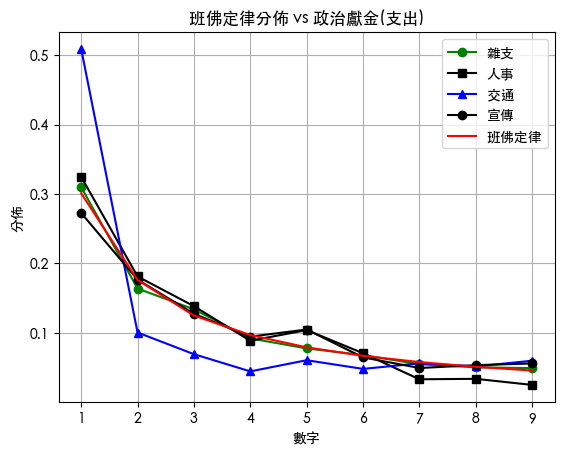

In [33]:
# 繪圖
digits = range(1, 10)

plt.plot(digits, benford_result['雜支支出'][1:10], label='雜支',color='green', marker='o', linestyle='-')
plt.plot(digits, benford_result['人事費用支出'][1:10], label='人事',color='black', marker='s', linestyle='-')
plt.plot(digits, benford_result['交通旅運支出'][1:10], label='交通',color='blue', marker='^', linestyle='-')
plt.plot(digits, benford_result['宣傳支出'][1:10], label='宣傳',color='black', marker='o', linestyle='-')

plt.plot(digits, expected, label="班佛定律", color='red',linestyle='-')

plt.xlabel('數字')
plt.ylabel('分佈')
plt.title("班佛定律分佈 vs 政治獻金(支出)")
plt.legend()
plt.grid(True)
plt.show()